In [2]:
import numpy as np
import matplotlib.pylab as plt
import time
from helper import get_clean_project_name
from pyiron_atomistics import Project
from pyiron_atomistics.atomistics.structure.atoms import ase_to_pyiron, pyiron_to_ase
import pyiron_gpl
import seaborn as sns
import pandas as pd
from pychromatic import Multiplot
from pychromatic.colors import accent

In [3]:
colors = {"g": "#1b9e77", "r": "#d95f02", "b": "#7570b3"}

In [4]:
pr = Project("validation_LiAl2")

In [5]:
struct_dict = dict()

# structures to be generated automatically
struct_dict["Al"] = dict()
struct_dict["Al"]["s_murn"] = ["fcc", "bcc"]
struct_dict["Al"]["a"] = 4.04

struct_dict["Li"] = dict()
struct_dict["Li"]["s_murn"] = ["bcc", "fcc"]
struct_dict["Li"]["a"] = 3.5


# structures to be read from file
struct_dict["Li2Al2"] = dict()
struct_dict["Li2Al2"]["s_murn"] = ["Li2Al2_cubic"]

struct_dict["LiAl3"] = dict()
struct_dict["LiAl3"]["s_murn"] = ["LiAl3_cubic"]

struct_dict["Li9Al4"] = dict()
struct_dict["Li9Al4"]["s_murn"] = ["Li9Al4_monoclinic"]

struct_dict["Li3Al2"] = dict()
struct_dict["Li3Al2"]["s_murn"] = ["Li3Al2_trigonal"]

struct_dict

{'Al': {'s_murn': ['fcc', 'bcc'], 'a': 4.04},
 'Li': {'s_murn': ['bcc', 'fcc'], 'a': 3.5},
 'Li2Al2': {'s_murn': ['Li2Al2_cubic']},
 'LiAl3': {'s_murn': ['LiAl3_cubic']},
 'Li9Al4': {'s_murn': ['Li9Al4_monoclinic']},
 'Li3Al2': {'s_murn': ['Li3Al2_trigonal']}}

In [6]:
fl_dict = {"Li2Al2_cubic": "mp_structures/LiAl_mp-1067_primitive.cif",
           "LiAl3_cubic":"mp_structures/LiAl3_mp-10890_primitive.cif",
           "Li9Al4_monoclinic":"mp_structures/Li9Al4_mp-568404_primitive.cif",
           "Li3Al2_trigonal":"mp_structures/Al2Li3-6021.cif"}

In [7]:
potentials_list = ['AlLi-eam', 'AlLi-hdnnp', 'AlLi-ace']

In [8]:
for pot in potentials_list:
    with pr.open(get_clean_project_name(pot)) as pr_pot:
        print(pr_pot)
        for compound, compound_dict in struct_dict.items():
            for crys_structure in compound_dict["s_murn"]:
                
                # Relax structure
                if crys_structure in ["fcc","bcc"]:
                    basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])
                else:
                    basis = pr_pot.create.structure.ase.read(fl_dict[crys_structure])
                    
                job_relax = pr_pot.create_job(pr_pot.job_type.Lammps, f"{compound}_{crys_structure}_relax", delete_existing_job=True)

                job_relax.structure = basis
                job_relax.potential = pot
                job_relax.calc_minimize(pressure=0)
                job_relax.run()
                
                # Murnaghan
                job_ref = pr_pot.create_job(pr_pot.job_type.Lammps, f"ref_job_{compound}_{crys_structure}")
                job_ref.structure = job_relax.get_structure(-1)
                job_ref.potential = pot
                job_ref.calc_minimize()
                
                murn_job = job_ref.create_job(pr_pot.job_type.Murnaghan, f"murn_job_{compound}_{crys_structure}")
                murn_job.input["vol_range"] = 0.1
                murn_job.run()

/mnt/c/Users/menon/Documents/winrepos/projects-workshops/potentials-workshop-2022/validation/validation_LiAl2/AlLi_eam/


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Al_fcc_relax was saved and received the ID: 1562
The job murn_job_Al_fcc was saved and received the ID: 1563
The job murn_job_Al_fcc_0_9 was saved and received the ID: 1564
The job murn_job_Al_fcc_0_92 was saved and received the ID: 1565
The job murn_job_Al_fcc_0_94 was saved and received the ID: 1566
The job murn_job_Al_fcc_0_96 was saved and received the ID: 1567
The job murn_job_Al_fcc_0_98 was saved and received the ID: 1568
The job murn_job_Al_fcc_1_0 was saved and received the ID: 1569
The job murn_job_Al_fcc_1_02 was saved and received the ID: 1570
The job murn_job_Al_fcc_1_04 was saved and received the ID: 1571
The job murn_job_Al_fcc_1_06 was saved and received the ID: 1572
The job murn_job_Al_fcc_1_08 was saved and received the ID: 1573
The job murn_job_Al_fcc_1_1 was saved and received the ID: 1574


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Al_bcc_relax was saved and received the ID: 1575
The job murn_job_Al_bcc was saved and received the ID: 1576
The job murn_job_Al_bcc_0_9 was saved and received the ID: 1577
The job murn_job_Al_bcc_0_92 was saved and received the ID: 1578
The job murn_job_Al_bcc_0_94 was saved and received the ID: 1579
The job murn_job_Al_bcc_0_96 was saved and received the ID: 1580
The job murn_job_Al_bcc_0_98 was saved and received the ID: 1581
The job murn_job_Al_bcc_1_0 was saved and received the ID: 1582
The job murn_job_Al_bcc_1_02 was saved and received the ID: 1583
The job murn_job_Al_bcc_1_04 was saved and received the ID: 1584
The job murn_job_Al_bcc_1_06 was saved and received the ID: 1585
The job murn_job_Al_bcc_1_08 was saved and received the ID: 1586
The job murn_job_Al_bcc_1_1 was saved and received the ID: 1587


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Li_bcc_relax was saved and received the ID: 1588
The job murn_job_Li_bcc was saved and received the ID: 1589
The job murn_job_Li_bcc_0_9 was saved and received the ID: 1590
The job murn_job_Li_bcc_0_92 was saved and received the ID: 1591
The job murn_job_Li_bcc_0_94 was saved and received the ID: 1592
The job murn_job_Li_bcc_0_96 was saved and received the ID: 1593
The job murn_job_Li_bcc_0_98 was saved and received the ID: 1594
The job murn_job_Li_bcc_1_0 was saved and received the ID: 1595
The job murn_job_Li_bcc_1_02 was saved and received the ID: 1596
The job murn_job_Li_bcc_1_04 was saved and received the ID: 1597
The job murn_job_Li_bcc_1_06 was saved and received the ID: 1598
The job murn_job_Li_bcc_1_08 was saved and received the ID: 1599
The job murn_job_Li_bcc_1_1 was saved and received the ID: 1600


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Li_fcc_relax was saved and received the ID: 1601
The job murn_job_Li_fcc was saved and received the ID: 1602
The job murn_job_Li_fcc_0_9 was saved and received the ID: 1603
The job murn_job_Li_fcc_0_92 was saved and received the ID: 1604
The job murn_job_Li_fcc_0_94 was saved and received the ID: 1605
The job murn_job_Li_fcc_0_96 was saved and received the ID: 1606
The job murn_job_Li_fcc_0_98 was saved and received the ID: 1607
The job murn_job_Li_fcc_1_0 was saved and received the ID: 1608
The job murn_job_Li_fcc_1_02 was saved and received the ID: 1609
The job murn_job_Li_fcc_1_04 was saved and received the ID: 1610
The job murn_job_Li_fcc_1_06 was saved and received the ID: 1611
The job murn_job_Li_fcc_1_08 was saved and received the ID: 1612
The job murn_job_Li_fcc_1_1 was saved and received the ID: 1613
The job Li2Al2_Li2Al2_cubic_relax was saved and received the ID: 1614
The job murn_job_Li2Al2_Li2Al2_cubic was saved and received the ID: 1615
The job murn_job_Li2Al2_Li2A

/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Al_fcc_relax was saved and received the ID: 1666
The job murn_job_Al_fcc was saved and received the ID: 1667
The job murn_job_Al_fcc_0_9 was saved and received the ID: 1668
The job murn_job_Al_fcc_0_92 was saved and received the ID: 1669
The job murn_job_Al_fcc_0_94 was saved and received the ID: 1670
The job murn_job_Al_fcc_0_96 was saved and received the ID: 1671
The job murn_job_Al_fcc_0_98 was saved and received the ID: 1672
The job murn_job_Al_fcc_1_0 was saved and received the ID: 1673
The job murn_job_Al_fcc_1_02 was saved and received the ID: 1674
The job murn_job_Al_fcc_1_04 was saved and received the ID: 1675
The job murn_job_Al_fcc_1_06 was saved and received the ID: 1676
The job murn_job_Al_fcc_1_08 was saved and received the ID: 1677
The job murn_job_Al_fcc_1_1 was saved and received the ID: 1678


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Al_bcc_relax was saved and received the ID: 1679
The job murn_job_Al_bcc was saved and received the ID: 1680
The job murn_job_Al_bcc_0_9 was saved and received the ID: 1681
The job murn_job_Al_bcc_0_92 was saved and received the ID: 1682
The job murn_job_Al_bcc_0_94 was saved and received the ID: 1683
The job murn_job_Al_bcc_0_96 was saved and received the ID: 1684
The job murn_job_Al_bcc_0_98 was saved and received the ID: 1685
The job murn_job_Al_bcc_1_0 was saved and received the ID: 1686
The job murn_job_Al_bcc_1_02 was saved and received the ID: 1687
The job murn_job_Al_bcc_1_04 was saved and received the ID: 1688
The job murn_job_Al_bcc_1_06 was saved and received the ID: 1689
The job murn_job_Al_bcc_1_08 was saved and received the ID: 1690
The job murn_job_Al_bcc_1_1 was saved and received the ID: 1691


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Li_bcc_relax was saved and received the ID: 1692
The job murn_job_Li_bcc was saved and received the ID: 1693
The job murn_job_Li_bcc_0_9 was saved and received the ID: 1694
The job murn_job_Li_bcc_0_92 was saved and received the ID: 1695
The job murn_job_Li_bcc_0_94 was saved and received the ID: 1696
The job murn_job_Li_bcc_0_96 was saved and received the ID: 1697
The job murn_job_Li_bcc_0_98 was saved and received the ID: 1698
The job murn_job_Li_bcc_1_0 was saved and received the ID: 1699
The job murn_job_Li_bcc_1_02 was saved and received the ID: 1700
The job murn_job_Li_bcc_1_04 was saved and received the ID: 1701
The job murn_job_Li_bcc_1_06 was saved and received the ID: 1702
The job murn_job_Li_bcc_1_08 was saved and received the ID: 1703
The job murn_job_Li_bcc_1_1 was saved and received the ID: 1704


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Li_fcc_relax was saved and received the ID: 1705
The job murn_job_Li_fcc was saved and received the ID: 1706
The job murn_job_Li_fcc_0_9 was saved and received the ID: 1707
The job murn_job_Li_fcc_0_92 was saved and received the ID: 1708
The job murn_job_Li_fcc_0_94 was saved and received the ID: 1709
The job murn_job_Li_fcc_0_96 was saved and received the ID: 1710
The job murn_job_Li_fcc_0_98 was saved and received the ID: 1711
The job murn_job_Li_fcc_1_0 was saved and received the ID: 1712
The job murn_job_Li_fcc_1_02 was saved and received the ID: 1713
The job murn_job_Li_fcc_1_04 was saved and received the ID: 1714
The job murn_job_Li_fcc_1_06 was saved and received the ID: 1715
The job murn_job_Li_fcc_1_08 was saved and received the ID: 1716
The job murn_job_Li_fcc_1_1 was saved and received the ID: 1717
The job Li2Al2_Li2Al2_cubic_relax was saved and received the ID: 1718
The job murn_job_Li2Al2_Li2Al2_cubic was saved and received the ID: 1719
The job murn_job_Li2Al2_Li2A

/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Al_fcc_relax was saved and received the ID: 1770
The job murn_job_Al_fcc was saved and received the ID: 1771
The job murn_job_Al_fcc_0_9 was saved and received the ID: 1772
The job murn_job_Al_fcc_0_92 was saved and received the ID: 1773
The job murn_job_Al_fcc_0_94 was saved and received the ID: 1774
The job murn_job_Al_fcc_0_96 was saved and received the ID: 1775
The job murn_job_Al_fcc_0_98 was saved and received the ID: 1776
The job murn_job_Al_fcc_1_0 was saved and received the ID: 1777
The job murn_job_Al_fcc_1_02 was saved and received the ID: 1778
The job murn_job_Al_fcc_1_04 was saved and received the ID: 1779
The job murn_job_Al_fcc_1_06 was saved and received the ID: 1780
The job murn_job_Al_fcc_1_08 was saved and received the ID: 1781
The job murn_job_Al_fcc_1_1 was saved and received the ID: 1782


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Al_bcc_relax was saved and received the ID: 1783
The job murn_job_Al_bcc was saved and received the ID: 1784
The job murn_job_Al_bcc_0_9 was saved and received the ID: 1785
The job murn_job_Al_bcc_0_92 was saved and received the ID: 1786
The job murn_job_Al_bcc_0_94 was saved and received the ID: 1787
The job murn_job_Al_bcc_0_96 was saved and received the ID: 1788
The job murn_job_Al_bcc_0_98 was saved and received the ID: 1789
The job murn_job_Al_bcc_1_0 was saved and received the ID: 1790
The job murn_job_Al_bcc_1_02 was saved and received the ID: 1791
The job murn_job_Al_bcc_1_04 was saved and received the ID: 1792
The job murn_job_Al_bcc_1_06 was saved and received the ID: 1793
The job murn_job_Al_bcc_1_08 was saved and received the ID: 1794
The job murn_job_Al_bcc_1_1 was saved and received the ID: 1795


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Li_bcc_relax was saved and received the ID: 1796
The job murn_job_Li_bcc was saved and received the ID: 1797
The job murn_job_Li_bcc_0_9 was saved and received the ID: 1798
The job murn_job_Li_bcc_0_92 was saved and received the ID: 1799
The job murn_job_Li_bcc_0_94 was saved and received the ID: 1800
The job murn_job_Li_bcc_0_96 was saved and received the ID: 1801
The job murn_job_Li_bcc_0_98 was saved and received the ID: 1802
The job murn_job_Li_bcc_1_0 was saved and received the ID: 1803
The job murn_job_Li_bcc_1_02 was saved and received the ID: 1804
The job murn_job_Li_bcc_1_04 was saved and received the ID: 1805
The job murn_job_Li_bcc_1_06 was saved and received the ID: 1806
The job murn_job_Li_bcc_1_08 was saved and received the ID: 1807
The job murn_job_Li_bcc_1_1 was saved and received the ID: 1808


/tmp/ipykernel_303/4075279773.py:9: DeprecationWarning: pyiron_atomistics.project.create_ase_bulk is deprecated: Use create.structure.bulk instead.
  basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])


The job Li_fcc_relax was saved and received the ID: 1809
The job murn_job_Li_fcc was saved and received the ID: 1810
The job murn_job_Li_fcc_0_9 was saved and received the ID: 1811
The job murn_job_Li_fcc_0_92 was saved and received the ID: 1812
The job murn_job_Li_fcc_0_94 was saved and received the ID: 1813
The job murn_job_Li_fcc_0_96 was saved and received the ID: 1814
The job murn_job_Li_fcc_0_98 was saved and received the ID: 1815
The job murn_job_Li_fcc_1_0 was saved and received the ID: 1816
The job murn_job_Li_fcc_1_02 was saved and received the ID: 1817
The job murn_job_Li_fcc_1_04 was saved and received the ID: 1818
The job murn_job_Li_fcc_1_06 was saved and received the ID: 1819
The job murn_job_Li_fcc_1_08 was saved and received the ID: 1820
The job murn_job_Li_fcc_1_1 was saved and received the ID: 1821
The job Li2Al2_Li2Al2_cubic_relax was saved and received the ID: 1822
The job murn_job_Li2Al2_Li2Al2_cubic was saved and received the ID: 1823
The job murn_job_Li2Al2_Li2A

In [10]:
# Only work with Murnaghan jobs
def get_only_murn(job_table):
    return (job_table.hamilton == "Murnaghan") & (job_table.status == "finished") 

def get_eq_vol(job_path):
    return job_path["output/equilibrium_volume"]

def get_eq_lp(job_path):
    return np.linalg.norm(job_path["output/structure/cell/cell"][0]) * np.sqrt(2)

def get_eq_bm(job_path):
    return job_path["output/equilibrium_bulk_modulus"]

def get_potential(job_path):
    return job_path.project.path.split("/")[-3]

def get_eq_energy(job_path):
    return job_path["output/equilibrium_energy"]

def get_n_atoms(job_path):
    return len(job_path["output/structure/positions"])

def get_ase_atoms(job_path):
    return pyiron_to_ase(job_path.structure).copy()


def get_potential(job_path):
    return job_path.project.path.split("/")[-2]

def get_crystal_structure(job_path):
    return job_path.job_name.split("_")[-1]

def get_compound(job_path):
    return job_path.job_name.split("_")[-2]

In [11]:
# Compile data using pyiron tables
table = pr.create_table("table_murn", delete_existing_job=True)
table.convert_to_object = True
table.db_filter_function = get_only_murn
table.add["potential"] = get_potential
table.add["ase_atoms"] = get_ase_atoms
table.add["compound"] = get_compound
table.add["crystal_structure"] = get_crystal_structure
table.add["a"] = get_eq_lp
table.add["eq_vol"] = get_eq_vol
table.add["eq_bm"] = get_eq_bm
table.add["eq_energy"] = get_eq_energy
table.add["n_atoms"] = get_n_atoms
table.run()

data_murn = table.get_dataframe()
data_murn["phase"] = data_murn.compound + "_" + data_murn.crystal_structure

The job table_murn was saved and received the ID: 1874


Loading and filtering jobs:   0%|          | 0/24 [00:00<?, ?it/s]

Processing jobs:   0%|          | 0/24 [00:00<?, ?it/s]

/home/menon/miniconda3/envs/potentials2023/lib/python3.10/site-packages/pyiron_base/jobs/datamining.py:636: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['potential', 'ase_atoms', 'compound', 'crystal_structure'], dtype='object')]

  self.pyiron_table._df.to_hdf(


In [14]:
data_murn

,job_id,potential,ase_atoms,compound,crystal_structure,a,eq_vol,eq_bm,eq_energy,n_atoms,phase
0,1563,AlLi_eam,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,fcc,4.040003,16.476033,77.547271,-3.483139,1,Al_fcc
1,1576,AlLi_eam,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,bcc,3.871488,15.795379,71.055726,-3.410797,1,Al_bcc
2,1589,AlLi_eam,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",Li,bcc,4.195477,20.125239,14.297189,-1.757074,1,Li_bcc
3,1602,AlLi_eam,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",Li,fcc,4.360986,20.731723,12.476249,-1.757894,1,Li_fcc
4,1615,AlLi_eam,"(Atom('Li', [4.982325840580395, 2.8765471652483536, 2.0340260069503224], index=0), Atom('Li', [7.473488760872885, 4.314820747870893, 3.051039010425718], index=1), Atom('Al', [-4.53145385072325e-12...",Li2Al2,cubic,7.046073,87.529398,81.909721,-11.499962,4,Li2Al2_cubic
5,1628,AlLi_eam,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('Al', [2.106874987963487, 2.106874987963487, 2.5801777102131027e-16], index=1), Atom('Al', [2.106874987963487, 1.2900888551065513e-16, 2.106874987963487...",LiAl3,cubic,5.959142,74.818210,79.201150,-12.511418,4,LiAl3_cubic
6,1641,AlLi_eam,"(Atom('Li', [5.756928222907686, 1.1632127945634083, 0.9825939412049634], index=0), Atom('Li', [3.602056288430966, 1.6786975615946829, 3.146875971249968], index=1), Atom('Li', [-3.9692339282772395,...",Li9Al4,monoclinic,15.018222,292.387586,50.694127,-31.917634,13,Li9Al4_monoclinic
7,1654,AlLi_eam,"(Atom('Al', [2.478732147692288, 1.4310976653077936, 2.172113377917639], index=0), Atom('Al', [-2.4787299535889, 4.293289857741875, 3.0348112984506437], index=1), Atom('Li', [9.9442149673587e-07, 1...",Li3Al2,trigonal,7.010910,110.938900,69.387897,-13.300782,5,Li3Al2_trigonal
8,1667,AlLi_hdnnp,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,fcc,4.015285,16.239848,79.722479,-3.483640,1,Al_fcc
9,1680,AlLi_hdnnp,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,bcc,3.956301,16.858766,94.252106,-3.389178,1,Al_bcc


In [30]:
df_dft_ref

,name,energy,vol,compound,number_of_atoms
0,/home/users/lysogy36/tools/VASP/Al-Li/DFT/LiAl_mp-1079240/murn/strain_1_02/data.json,-21.708879,18.907780,LiAl_mp-1079240,8
1,/home/users/lysogy36/tools/VASP/Al-Li/DFT/LiAl_mp-1079240__221/shake4/murn/strain_1_1/data.json,-84.273294,22.352820,LiAl_mp-1079240__221,32
2,/home/users/lysogy36/tools/VASP/Al-Li/DFT/LiAl_mp-1067__222/shake4/murn/strain_1_04/data.json,-87.493709,18.244104,LiAl_mp-1067__222,32
3,/home/users/lysogy36/tools/VASP/Al-Li/DFT/LiAl_mp-1079240__221/shake4/murn/strain_1_02/data.json,-85.324225,20.727161,LiAl_mp-1079240__221,32
4,/home/users/lysogy36/tools/VASP/Al-Li/DFT/LiAl_mp-1191737__112/shake2/murn/strain_1_1/data.json,-118.672546,25.266947,LiAl_mp-1191737__112,48
...,...,...,...,...,...
600,Li_fcc_murn_06,-7.032308,20.407972,Li_fcc,4
601,Li_fcc_murn_07,-7.029867,20.808128,Li_fcc,4
602,Li_fcc_murn_08,-7.025015,21.208284,Li_fcc,4
603,Li_fcc_murn_09,-7.017952,21.608440,Li_fcc,4


In [12]:
df_dft_ref = pd.read_pickle("dft_ref.pckl")

al_fcc = df_dft_ref[df_dft_ref["compound"]=="Al_fcc"]
li = df_dft_ref[df_dft_ref["compound"].isin(["Li_bcc","Li_fcc"])]
df_mixed = df_dft_ref[df_dft_ref["compound"].isin(["LiAl_mp-1067","LiAl3_mp-10890","Li9Al4_mp-568404","Li3Al2_mp-16506","LiAl_mp-1079240"])]

li["energy_per_atom"] = li["energy"]/li["number_of_atoms"]
# li

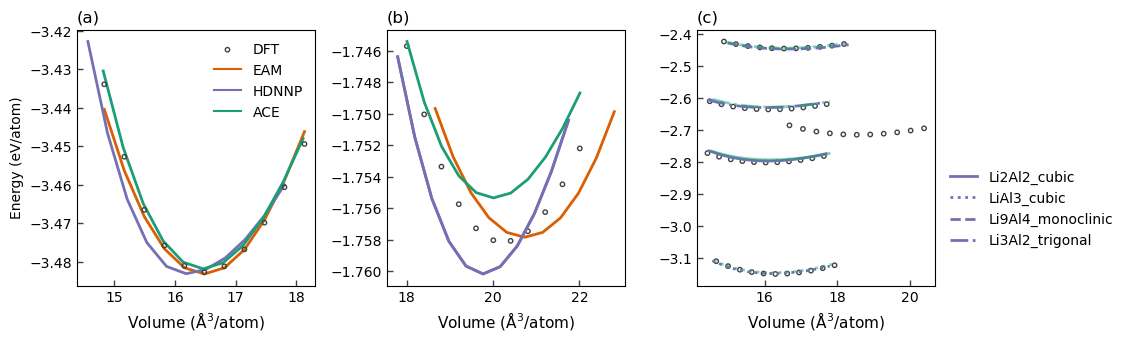

In [32]:
mlt = Multiplot(columns=3, width=800, ratio=0.3, wspace=0.3)

#--------------------------------------------------------
pot = "AlLi_eam"
mask1 = data_murn["compound"]=="Al"
data1 = data_murn[(data_murn.potential == get_clean_project_name(pot)) & (mask1)]
mask2 = data_murn["compound"]=="Li"
data2 = data_murn[(data_murn.potential == get_clean_project_name(pot)) & (mask2)]
mask3 = data_murn["compound"].isin(["Al","Li"])
data3 = data_murn[(data_murn.potential == get_clean_project_name(pot)) & (~mask3)]

data1 = data1[data1["crystal_structure"] == "fcc"]
for j,(_, row) in enumerate(data1.iterrows()):
    murn_job = pr.load(row["job_id"])
    murn_df = murn_job.output_to_pandas()
    n_atoms = row["n_atoms"]
    #if row
    mlt[0,0].plot(murn_df["volume"]/n_atoms, murn_df["energy"]/n_atoms,"-",
                        lw=2,
                        color=colors["r"])

data2 = data2[data2["crystal_structure"] == "fcc"]
for j,(_, row) in enumerate(data2.iterrows()):
    murn_job = pr.load(row["job_id"])
    murn_df = murn_job.output_to_pandas()
    n_atoms = row["n_atoms"]
    
    mlt[0,1].plot(murn_df["volume"]/n_atoms, murn_df["energy"]/n_atoms,"-",
                        lw=2,
                        label= row["phase"], 
                        color=colors['r'])
#--------------------------------------------------------------------------------------


#LEGENDS
mlt[0,0].scatter(al_fcc["vol"],al_fcc["energy"]/al_fcc["number_of_atoms"],
                    facecolor="none",edgecolor=accent["dgrey"],s=10, zorder=10)
lip = li[li['compound'] == 'Li_fcc']        
mlt[0,1].scatter(lip["vol"],lip["energy"]/lip["number_of_atoms"],
                        facecolor="none", edgecolor=accent['dgrey'], s=10)
mlt[0,2].scatter(df_mixed["vol"],df_mixed["energy"]/df_mixed["number_of_atoms"],
                        facecolor="none",edgecolor=accent['dgrey'],s=10)

mlt[0,0].scatter([],[], facecolor="none",edgecolor=accent["dgrey"],s=10,label="DFT")
mlt[0,0].plot([],[], color=colors["r"], label="EAM")
mlt[0,0].plot([],[], color=colors["b"], label="HDNNP")
mlt[0,0].plot([],[], color=colors["g"], label="ACE")



#---------------------------------------------------------------------------------------
"""
Plot for HDNNP
"""
pot = "AlLi_hdnnp"
mask1 = data_murn["compound"]=="Al"
data1 = data_murn[(data_murn.potential == get_clean_project_name(pot)) & (mask1)]
mask2 = data_murn["compound"]=="Li"
data2 = data_murn[(data_murn.potential == get_clean_project_name(pot)) & (mask2)]
mask3 = data_murn["compound"].isin(["Al","Li"])
data3 = data_murn[(data_murn.potential == get_clean_project_name(pot)) & (~mask3)]
data1 = data1[data1["crystal_structure"] == "fcc"]

"""
Al plot
"""
for j,(_, row) in enumerate(data1.iterrows()):
    murn_job = pr.load(row["job_id"])
    murn_df = murn_job.output_to_pandas()
    n_atoms = row["n_atoms"]
    #if row
    mlt[0,0].plot(murn_df["volume"]/n_atoms, murn_df["energy"]/n_atoms,"-",
                        lw=2,
                        color=colors["b"])




data2 = data2[data2["crystal_structure"] == "fcc"]
for j,(_, row) in enumerate(data2.iterrows()):
    murn_job = pr.load(row["job_id"])
    murn_df = murn_job.output_to_pandas()
    n_atoms = row["n_atoms"]

    #if row["phase"] == "Li2Al2_cubic":
    mlt[0,1].plot(murn_df["volume"]/n_atoms, murn_df["energy"]/n_atoms,"-",
                        lw=2,
                        label= r"LiAl", 
                        color=colors['b'])
    #elif row["phase"] == "LiAl3_cubic":
    mlt[0,1].plot(murn_df["volume"]/n_atoms, murn_df["energy"]/n_atoms,"-",
                        lw=2,
                        label= r"$\mathrm{Li}\mathrm{Al}_3$", 
                        color=colors['b'])
    

"""
Li plot
"""


"""
Mixed plot
"""
ls = ['solid', 'dotted', 'dashed', 'dashdot', '--']

for j,(_, row) in enumerate(data3.iterrows()):
    #print(j)
    murn_job = pr.load(row["job_id"])
    murn_df = murn_job.output_to_pandas()
    n_atoms = row["n_atoms"]

    
    mlt[0,2].plot(murn_df["volume"]/n_atoms, murn_df["energy"]/n_atoms,ls=ls[j],
                        lw=2,
                        color=colors["b"],
                        label= row["phase"], 
                        )
    
    # ax_list[i,1].legend(prop={"size":16})
#----------------------------------------------------------------------------------    


#---------------------------------------------------------------------------------------
pot = "AlLi-ace"
mask1 = data_murn["compound"]=="Al"
data1 = data_murn[(data_murn.potential == get_clean_project_name(pot)) & (mask1)]
mask2 = data_murn["compound"]=="Li"
data2 = data_murn[(data_murn.potential == get_clean_project_name(pot)) & (mask2)]
mask3 = data_murn["compound"].isin(["Al","Li"])
data3 = data_murn[(data_murn.potential == get_clean_project_name(pot)) & (~mask3)]

data1 = data1[data1["crystal_structure"] == "fcc"]
for j,(_, row) in enumerate(data1.iterrows()):
    murn_job = pr.load(row["job_id"])
    murn_df = murn_job.output_to_pandas()
    n_atoms = row["n_atoms"]
    #if row
    mlt[0,0].plot(murn_df["volume"]/n_atoms, murn_df["energy"]/n_atoms,"-",
                        lw=2,
                        color=colors["g"])

data2 = data2[data2["crystal_structure"] == "fcc"]
for j,(_, row) in enumerate(data2.iterrows()):
    murn_job = pr.load(row["job_id"])
    murn_df = murn_job.output_to_pandas()
    n_atoms = row["n_atoms"]
    
    mlt[0,1].plot(murn_df["volume"]/n_atoms, murn_df["energy"]/n_atoms,"-",
                        lw=2,
                        label= row["phase"], 
                        color=colors['g'])
    


ls = ['solid', 'dotted', 'dashed', 'dashdot', '--']

for j,(_, row) in enumerate(data3.iterrows()):
#    #print(j)
    murn_job = pr.load(row["job_id"])
    murn_df = murn_job.output_to_pandas()
    n_atoms = row["n_atoms"]
    
    mlt[0,2].plot(murn_df["volume"]/n_atoms, murn_df["energy"]/n_atoms,ls=ls[j],
                        lw=2,
                        color=colors["g"],
                        alpha=0.5,
                        )
    
    # ax_list[i,1].legend(prop={"size":16})
    

mlt[0,0].set_title("(a)", loc="left", fontsize=12)
mlt[0,1].set_title("(b)", loc="left", fontsize=12)
mlt[0,2].set_title("(c)", loc="left", fontsize=12)
mlt[0,0].legend(frameon=False)
mlt[0,2].legend(frameon=False, bbox_to_anchor=[1.8, 0.5])
mlt[0,0].set_xlabel(r"Volume ($\mathrm{\AA}^3/$atom)", fontsize=11)
mlt[0,1].set_xlabel(r"Volume ($\mathrm{\AA}^3/$atom)", fontsize=11)
mlt[0,2].set_xlabel(r"Volume ($\mathrm{\AA}^3/$atom)", fontsize=11)
mlt[0,0].set_ylabel(r"Energy (eV/atom)")

plt.savefig("img_ev_curve.png", dpi=300, bbox_inches='tight')

# Elastic constants and phonos

In [33]:
list_of_phases = ["Al_fcc","Li_bcc","Li2Al2_cubic","LiAl3_cubic"]

subset_murn = data_murn[data_murn["phase"].isin(list_of_phases)]
subset_murn

,job_id,potential,ase_atoms,compound,crystal_structure,a,eq_vol,eq_bm,eq_energy,n_atoms,phase
0,1563,AlLi_eam,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,fcc,4.040003,16.476033,77.547271,-3.483139,1,Al_fcc
2,1589,AlLi_eam,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",Li,bcc,4.195477,20.125239,14.297189,-1.757074,1,Li_bcc
4,1615,AlLi_eam,"(Atom('Li', [4.982325840580395, 2.8765471652483536, 2.0340260069503224], index=0), Atom('Li', [7.473488760872885, 4.314820747870893, 3.051039010425718], index=1), Atom('Al', [-4.53145385072325e-12...",Li2Al2,cubic,7.046073,87.529398,81.909721,-11.499962,4,Li2Al2_cubic
5,1628,AlLi_eam,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('Al', [2.106874987963487, 2.106874987963487, 2.5801777102131027e-16], index=1), Atom('Al', [2.106874987963487, 1.2900888551065513e-16, 2.106874987963487...",LiAl3,cubic,5.959142,74.818210,79.201150,-12.511418,4,LiAl3_cubic
8,1667,AlLi_hdnnp,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,fcc,4.015285,16.239848,79.722479,-3.483640,1,Al_fcc
10,1693,AlLi_hdnnp,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",Li,bcc,4.304145,21.683216,11.782073,-1.760709,1,Li_bcc
12,1719,AlLi_hdnnp,"(Atom('Li', [4.49748505780457, 2.59662420879972, 1.8360905862356112], index=0), Atom('Li', [6.746227586708631, 3.894936313198549, 2.754135879353], index=1), Atom('Al', [-2.045268969864441e-12, 1.4...",Li2Al2,cubic,6.360404,64.339882,54.079723,-11.186353,4,Li2Al2_cubic
13,1732,AlLi_hdnnp,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('Al', [2.0073006275201934, 2.0073006275201934, 2.4582342884190786e-16], index=1), Atom('Al', [2.0073006275201934, 1.2291171442095393e-16, 2.007300627520...",LiAl3,cubic,5.677504,64.841662,61.778746,-12.592512,4,LiAl3_cubic
16,1771,AlLi_ace,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,fcc,4.038342,16.464346,82.985710,-3.481992,1,Al_fcc
18,1797,AlLi_ace,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",Li,bcc,4.236658,20.696341,12.643968,-1.754260,1,Li_bcc


In [34]:
for pot in potentials_list:
    group_name = get_clean_project_name(pot)
    pr_pot = pr.create_group(group_name)
    print(group_name)
    
    for _, row in subset_murn[subset_murn.potential==group_name].iterrows():
        job_id = row["job_id"]
        
        job_ref = pr_pot.create_job(pr_pot.job_type.Lammps, f"ref_job_{row.compound}_{row.crystal_structure}")
        ref = pr_pot.load(job_id)
        job_ref.structure = ref.structure
        job_ref.potential = pot
        job_ref.calc_minimize()
        
        elastic_job = job_ref.create_job(pr_pot.job_type.ElasticMatrixJob, f"elastic_job_{row.compound}_{row.crystal_structure}")
        elastic_job.input["eps_range"] = 0.05
        elastic_job.run()
        
        
        phonopy_job = job_ref.create_job(pr_pot.job_type.PhonopyJob, f"phonopy_job_{row.compound}_{row.crystal_structure}")
        job_ref.calc_static()
        phonopy_job.run()

AlLi_eam
The job elastic_job_Al_fcc was saved and received the ID: 1875
The job s_e_0 was saved and received the ID: 1876
The job s_01_e_m0_05000 was saved and received the ID: 1877
The job s_01_e_m0_02500 was saved and received the ID: 1878
The job s_01_e_0_02500 was saved and received the ID: 1879
The job s_01_e_0_05000 was saved and received the ID: 1880
The job s_08_e_m0_05000 was saved and received the ID: 1881
The job s_08_e_m0_02500 was saved and received the ID: 1882
The job s_08_e_0_02500 was saved and received the ID: 1883
The job s_08_e_0_05000 was saved and received the ID: 1884
The job s_23_e_m0_05000 was saved and received the ID: 1885
The job s_23_e_m0_02500 was saved and received the ID: 1886
The job s_23_e_0_02500 was saved and received the ID: 1887
The job s_23_e_0_05000 was saved and received the ID: 1888
The job phonopy_job_Al_fcc was saved and received the ID: 1889
The job ref_job_Al_fcc_0 was saved and received the ID: 1890
The job elastic_job_Li_bcc was saved and

In [35]:
def filter_elastic(job_table):
    return (job_table.hamilton == "ElasticMatrixJob") & (job_table.status == "finished")

# Get corresponding elastic constants
def get_c11(job_path):
    return job_path["output/elasticmatrix"]["C"][0, 0]

def get_c12(job_path):
    return job_path["output/elasticmatrix"]["C"][0, 1]

def get_c44(job_path):
    return job_path["output/elasticmatrix"]["C"][3, 3]

In [36]:
table = pr.create_table("table_elastic", delete_existing_job=True)
table.db_filter_function = filter_elastic
table.add["potential"] = get_potential
table.add["C11"] = get_c11
table.add["C12"] = get_c12
table.add["C44"] = get_c44
table.add["compound"] = get_compound
table.add["crystal_structure"] = get_crystal_structure

table.run()
data_elastic = table.get_dataframe()
data_elastic["phase"] = data_elastic.compound + "_" + data_elastic.crystal_structure
data_elastic = data_elastic[data_elastic["phase"].isin(list_of_phases)]
data_elastic

The job table_elastic was saved and received the ID: 2073


Loading and filtering jobs:   0%|          | 0/12 [00:00<?, ?it/s]

Processing jobs:   0%|          | 0/12 [00:00<?, ?it/s]

,job_id,potential,C11,C12,C44,compound,crystal_structure,phase
0,1875,AlLi_eam,98.072058,66.458423,46.128769,Al,fcc,Al_fcc
1,1891,AlLi_eam,14.905778,14.365771,11.504125,Li,bcc,Li_bcc
2,1907,AlLi_eam,130.928772,50.341046,25.279659,Li2Al2,cubic,Li2Al2_cubic
3,1924,AlLi_eam,97.232783,67.752767,22.146522,LiAl3,cubic,LiAl3_cubic
4,1941,AlLi_hdnnp,131.078962,67.060904,48.627761,Al,fcc,Al_fcc
5,1957,AlLi_hdnnp,11.788102,13.454052,12.623277,Li,bcc,Li_bcc
6,1973,AlLi_hdnnp,119.859227,20.487189,41.936676,Li2Al2,cubic,Li2Al2_cubic
7,1990,AlLi_hdnnp,109.832419,44.780823,43.105017,LiAl3,cubic,LiAl3_cubic
8,2007,AlLi_ace,130.390756,61.022690,39.354664,Al,fcc,Al_fcc
9,2023,AlLi_ace,13.107614,12.416830,10.918415,Li,bcc,Li_bcc


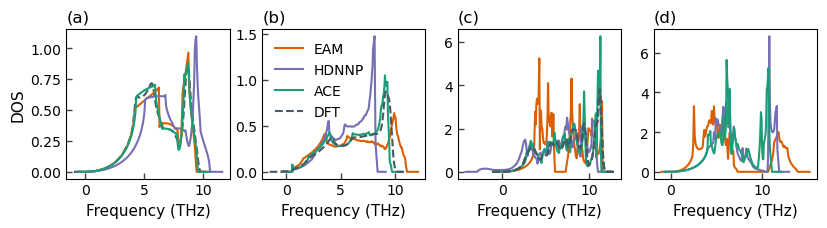

In [48]:
mlt = Multiplot(columns=4, rows=1, width=700, ratio=0.2, )#wspace=0.3)


phase = 'Al_fcc'
data = data_elastic[(data_elastic.phase == phase)]
dft_ref = pd.read_csv(phase.lower()+"_dos.csv")
mlt[0,0].plot(dft_ref["dos_energy"],dft_ref["dos_total"],ls="--",lw=1.5,color=accent['lgrey'],label="DFT")

pot = 'AlLi_eam'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,0].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["r"], 
        label='EAM')
pot = 'AlLi_hdnnp'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,0].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["b"], 
        label='HDNNP')
pot = 'AlLi_ace'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,0].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["g"], 
        label='ACE')

mlt[0,0].set_ylabel("DOS",fontsize=11)
mlt[0,0].set_title("(a)", loc='left', fontsize=12)
mlt[0,0].set_xlabel("Frequency (THz)",fontsize=11)

phase = 'Li_bcc'
data = data_elastic[(data_elastic.phase == phase)]
dft_ref = pd.read_csv(phase.lower()+"_dos.csv")
pot = 'AlLi_eam'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,1].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["r"], 
        label='EAM')
pot = 'AlLi_hdnnp'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,1].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["b"], 
        label='HDNNP')
pot = 'AlLi_ace'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,1].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["g"], 
        label='ACE')
mlt[0,1].plot(dft_ref["dos_energy"],dft_ref["dos_total"],ls="--",lw=1.5,color=accent['lgrey'],label="DFT")
mlt[0,1].set_title("(b)", loc='left', fontsize=12)
mlt[0,1].set_xlabel("Frequency (THz)",fontsize=11)
mlt[0,1].legend(frameon=False)


phase = 'Li2Al2_cubic'
data = data_elastic[(data_elastic.phase == phase)]
dft_ref = pd.read_csv(phase.lower()+"_dos.csv")
pot = 'AlLi_eam'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,2].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["r"], 
        label='EAM')
pot = 'AlLi_hdnnp'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,2].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["b"], 
        label='HDNNP')
pot = 'AlLi_ace'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,2].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["g"], 
        label='ACE')

mlt[0,2].plot(dft_ref["dos_energy"],dft_ref["dos_total"],ls="--",lw=1.5,color=accent['lgrey'],label="DFT")
#mlt[0,2].set_ylabel("DOS",fontsize=11)
mlt[0,2].set_title("(c)", loc='left', fontsize=12)
mlt[0,2].set_xlabel("Frequency (THz)",fontsize=11)
mlt[0,2].plot(dft_ref["dos_energy"],dft_ref["dos_total"],ls="--",lw=1.5,color=accent['lgrey'],label="DFT")


phase = 'LiAl3_cubic'
data = data_elastic[(data_elastic.phase == phase)]
dft_ref = pd.read_csv(phase.lower()+"_dos.csv")
pot = 'AlLi_eam'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,3].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["r"], 
        label='EAM')
pot = 'AlLi_hdnnp'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,3].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["b"], 
        label='HDNNP')
pot = 'AlLi_ace'
phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
mlt[0,3].plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], 
        lw=1.5,
        color=colors["g"], 
        label='ACE')
mlt[0,3].set_title("(d)", loc='left', fontsize=12)
mlt[0,3].set_xlabel("Frequency (THz)",fontsize=11)
plt.savefig("img_dos.png", dpi=300, bbox_inches='tight')

# CONVEX HULL

In [49]:
from collections import Counter

# pot = "LiAl_yace"

# data_convexhull = data_murn[data_murn["potential"]==pot]
data_convexhull = data_murn.copy()
data_convexhull.head(2)

,job_id,potential,ase_atoms,compound,crystal_structure,a,eq_vol,eq_bm,eq_energy,n_atoms,phase
0,1563,AlLi_eam,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,fcc,4.040003,16.476033,77.547271,-3.483139,1,Al_fcc
1,1576,AlLi_eam,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,bcc,3.871488,15.795379,71.055726,-3.410797,1,Al_bcc


In [67]:
def get_e_form(data_convexhull):
    data_convexhull["comp_dict"] = data_convexhull["ase_atoms"].map(lambda at: Counter(at.get_chemical_symbols()))
    data_convexhull["n_Al"] = data_convexhull["comp_dict"].map(lambda d: d.get("Al",0))
    data_convexhull["n_Li"] = data_convexhull["comp_dict"].map(lambda d: d.get("Li",0))

    data_convexhull["cAl"]= data_convexhull["n_Al"]/data_convexhull["n_atoms"] * 100
    data_convexhull["cLi"]= data_convexhull["n_Li"]/data_convexhull["n_atoms"] * 100

    E_f_Al = data_convexhull.loc[data_convexhull["n_Li"]==0,"eq_energy"].min()
    E_f_Li = data_convexhull.loc[data_convexhull["n_Al"]==0,"eq_energy"].min()

    data_convexhull["E_form"]=(data_convexhull["eq_energy"])-(data_convexhull[["n_Al","n_Li"]].values * [E_f_Al, E_f_Li]).sum(axis=1)
    data_convexhull["E_form_per_atom"] = data_convexhull["E_form"]/data_convexhull["n_atoms"] * 1e3

    data_convexhull = data_convexhull.sort_values("cLi")

    return data_convexhull

df_eam = get_e_form(data_murn[data_murn["potential"]=="AlLi_eam"].copy())
df_nnp = get_e_form(data_murn[data_murn["potential"]=="AlLi_hdnnp"].copy())
df_ace = get_e_form(data_murn[data_murn["potential"]=="AlLi_ace"].copy())

data_convexhull = pd.concat([df_eam, df_ace, df_nnp])
data_convexhull

,job_id,potential,ase_atoms,compound,crystal_structure,a,eq_vol,eq_bm,eq_energy,n_atoms,phase,comp_dict,n_Al,n_Li,cAl,cLi,E_form,E_form_per_atom
0,1563,AlLi_eam,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,fcc,4.040003,16.476033,77.547271,-3.483139,1,Al_fcc,{'Al': 1},1,0,100.000000,0.000000,0.000000,0.000000
1,1576,AlLi_eam,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,bcc,3.871488,15.795379,71.055726,-3.410797,1,Al_bcc,{'Al': 1},1,0,100.000000,0.000000,0.072342,72.342370
5,1628,AlLi_eam,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('Al', [2.106874987963487, 2.106874987963487, 2.5801777102131027e-16], index=1), Atom('Al', [2.106874987963487, 1.2900888551065513e-16, 2.106874987963487...",LiAl3,cubic,5.959142,74.818210,79.201150,-12.511418,4,LiAl3_cubic,"{'Li': 1, 'Al': 3}",3,1,75.000000,25.000000,-0.304106,-76.026607
4,1615,AlLi_eam,"(Atom('Li', [4.982325840580395, 2.8765471652483536, 2.0340260069503224], index=0), Atom('Li', [7.473488760872885, 4.314820747870893, 3.051039010425718], index=1), Atom('Al', [-4.53145385072325e-12...",Li2Al2,cubic,7.046073,87.529398,81.909721,-11.499962,4,Li2Al2_cubic,"{'Li': 2, 'Al': 2}",2,2,50.000000,50.000000,-1.017895,-254.473747
7,1654,AlLi_eam,"(Atom('Al', [2.478732147692288, 1.4310976653077936, 2.172113377917639], index=0), Atom('Al', [-2.4787299535889, 4.293289857741875, 3.0348112984506437], index=1), Atom('Li', [9.9442149673587e-07, 1...",Li3Al2,trigonal,7.010910,110.938900,69.387897,-13.300782,5,Li3Al2_trigonal,"{'Al': 2, 'Li': 3}",2,3,40.000000,60.000000,-1.060822,-212.164341
6,1641,AlLi_eam,"(Atom('Li', [5.756928222907686, 1.1632127945634083, 0.9825939412049634], index=0), Atom('Li', [3.602056288430966, 1.6786975615946829, 3.146875971249968], index=1), Atom('Li', [-3.9692339282772395,...",Li9Al4,monoclinic,15.018222,292.387586,50.694127,-31.917634,13,Li9Al4_monoclinic,"{'Li': 9, 'Al': 4}",4,9,30.769231,69.230769,-2.164030,-166.463869
3,1602,AlLi_eam,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",Li,fcc,4.360986,20.731723,12.476249,-1.757894,1,Li_fcc,{'Li': 1},0,1,0.000000,100.000000,0.000000,0.000000
2,1589,AlLi_eam,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",Li,bcc,4.195477,20.125239,14.297189,-1.757074,1,Li_bcc,{'Li': 1},0,1,0.000000,100.000000,0.000820,0.819742
16,1771,AlLi_ace,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,fcc,4.038342,16.464346,82.985710,-3.481992,1,Al_fcc,{'Al': 1},1,0,100.000000,0.000000,0.000000,0.000000
17,1784,AlLi_ace,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",Al,bcc,3.952764,16.810024,72.318418,-3.388443,1,Al_bcc,{'Al': 1},1,0,100.000000,0.000000,0.093549,93.549083


In [68]:
convex_ref = pd.read_pickle("dft_convexhull_ref.pckl")
convex_ref

,name,energy,vol,compound,ao,number_of_atoms,comp_dict,n_Al,n_Li,cAl,cLi,E_form,E_form_per_atom
438,/home/users/lysogy36/tools/VASP/Al-Li/DFT/Al_fcc/murn/strain_1_0/data.json,-13.930995,16.484415,Al_fcc,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('Al', [0.0, 2.019983601551115, 2.019983601551115], index=1), Atom('Al', [2.019983601551115, 0.0, 2.019983601551115], index=2), Atom('Al', [2.01998360155...",4,{'Al': 4},4,0,100.000000,0.000000,0.000000,0.000000
910,/home/users/lysogy36/tools/VASP/Al-Li/DFT/LiAl3_mp-10890/murn/strain_1_0/data.json,-12.597018,16.295840,LiAl3_mp-10890,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('Al', [2.0122514573524146, 2.0122514573524146, 0.0], index=1), Atom('Al', [2.0122514573524146, 0.0, 2.0122514573524146], index=2), Atom('Al', [0.0, 2.01...",4,"{'Li': 1, 'Al': 3}",3,1,75.000000,25.000000,-0.392474,-98.118408
1950,/home/users/lysogy36/tools/VASP/Al-Li/DFT/LiAl_mp-1067/murn/strain_1_0/data.json,-11.204795,16.028228,LiAl_mp-1067,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('Li', [2.246243529971499, 1.2968693066945, 0.9170250810763773], index=1), Atom('Al', [4.492487059942998, 2.593738613389, 1.8340501621527545], index=2), ...",4,"{'Li': 2, 'Al': 2}",2,2,50.000000,50.000000,-0.726701,-181.675339
1275,/home/users/lysogy36/tools/VASP/Al-Li/DFT/LiAl_mp-1079240/murn/strain_1_0/data.json,-21.715330,18.537039,LiAl_mp-1079240,"(Atom('Li', [-2.093764484173552e-06, 2.574581270471953, 3.588630766943668], index=0), Atom('Li', [2.229653899294873, 1.2872887040708958, 5.022609593138096], index=1), Atom('Li', [2.229653899294873...",8,"{'Li': 4, 'Al': 4}",4,4,50.000000,50.000000,-0.759143,-94.892853
652,/home/users/lysogy36/tools/VASP/Al-Li/DFT/Li3Al2_mp-16506/murn/strain_1_0/data.json,-13.176984,16.098544,Li3Al2_mp-16506,"(Atom('Li', [7.387307289355338, 3.3557842846492325, 2.205190367378745], index=0), Atom('Li', [4.984874333407062, 2.2644466100798333, 1.488038392346624], index=1), Atom('Li', [0.0, 0.0, 0.0], index...",5,"{'Li': 3, 'Al': 2}",2,3,40.000000,60.000000,-0.942593,-188.518538
231,/home/users/lysogy36/tools/VASP/Al-Li/DFT/Li9Al4_mp-568404/murn/strain_1_0/data.json,-31.786765,16.532577,Li9Al4_mp-568404,"(Atom('Li', [15.085585487572331, 3.6087478779487228, 4.372653838370371], index=0), Atom('Li', [13.209884188064274, 3.160045831227256, 2.4668794892606694], index=1), Atom('Li', [6.31626414433567, 1...",13,"{'Li': 9, 'Al': 4}",4,9,30.769231,69.230769,-2.049089,-157.622253
1343,/home/users/lysogy36/tools/VASP/Al-Li/DFT/Li_bcc/murn/strain_1_0/data.json,-3.512596,20.099126,Li_bcc,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('Li', [1.712796338409787, 1.712796338409787, 1.712796338409787], index=1))",2,{'Li': 2},0,2,0.000000,100.000000,0.000000,0.000000


In [52]:
from scipy.spatial import ConvexHull,convex_hull_plot_2d

def get_convexhull(df):
    df_tmp = df.reset_index()

    points = np.zeros([len(df_tmp["cLi"]),2])

    for i,row in df_tmp.iterrows():
        points[i,0], points[i,1] =  float(row["cLi"]), float(row["E_form_per_atom"])

    hull = ConvexHull(points)
    return hull,points

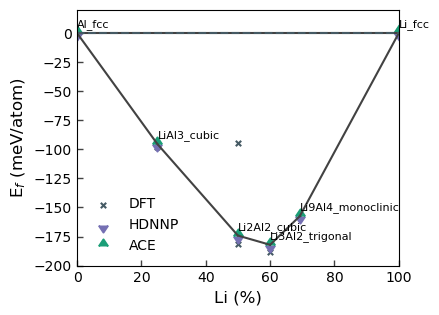

In [93]:
mlt = Multiplot(width=300, ratio=0.8, )#wspace=0.3)
mlt[0,0].scatter(convex_ref["cLi"],convex_ref["E_form_per_atom"],marker="x",s=15,
              label="DFT", color=accent['lgrey'])

pot = "AlLi_hdnnp"
dfs = ([pd.DataFrame(y) for x, y in data_convexhull.groupby(by='potential', as_index=False)])

df_tmp = dfs[0].copy()
#break
#df_tmp = df_tmp.loc[df_tmp["potential"]==pot]
mlt[0,0].scatter(df_tmp["cLi"], df_tmp["E_form_per_atom"], marker=11, s=45, c=colors["b"], label="HDNNP")
df_tmp = df_tmp[(df_tmp["E_form_per_atom"]<0.1) & (df_tmp["E_form"]<0.1)]
hull,points = get_convexhull(df_tmp)

for simplex in hull.simplices:
    mlt[0,0].plot(points[simplex, 0], points[simplex, 1], c=accent["dgrey"])

mlt[0,0].axhline(0,ls="--",color=accent['lgrey'])
#mlt[0,0].plot(df_tmp["cLi"], df_tmp["E_form_per_atom"], 10, markersize=10, label="potential", color=colors["b"], alpha=0.5)

pot = "AlLi_ace"
dfs = ([pd.DataFrame(y) for x, y in data_convexhull.groupby(by='potential', as_index=False)])

df_tmp = dfs[0].copy()
#break
#df_tmp = df_tmp.loc[df_tmp["potential"]==pot]
mlt[0,0].scatter(df_tmp["cLi"], df_tmp["E_form_per_atom"], marker=10, s=45, c=colors["g"], label="ACE")
df_tmp = df_tmp[(df_tmp["E_form_per_atom"]<0.1) & (df_tmp["E_form"]<0.1)]
hull,points = get_convexhull(df_tmp)



mlt[0,0].set_xlabel("Li (%)",fontsize="12")
mlt[0,0].set_ylabel("E$_f$ (meV/atom)",fontsize="12")
#ax[i].set_ylim(-200,10)
for _,row in dfs[0].iterrows():
    if row["phase"] not in ['Al_bcc', 'Li_bcc']:
        mlt[0,0].text((row["cLi"]+0.01),row["E_form_per_atom"]+5,row["phase"],size=8)
mlt[0,0].set_ylim(-200, 20)
mlt[0,0].set_xlim(-0, 100)
mlt[0,0].legend(frameon=False)
plt.savefig("img_convex_hull.png", dpi=300, bbox_inches='tight')